In [ ]:
#Importing the packages
import tensorflow as tf #import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


##Step 1 : Importing the dataset

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist #load the datasets fashion_mnist from keras

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data() #load the data from fashion_mnist

4423680/4422102 [==============================] - 0s 0us/step


##Step 2: Processing the Data

In [ ]:
train_images=train_images/255.0   #convert the data to the value of 0 and 1 for greyscale images
test_images=test_images/255.0

In [ ]:
train_images[0].shape #calculate the size of the data

(28, 28)

In [ ]:
test_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
print('Training set size:',train_images.shape,'\nTest set size:',test_images.shape)

Training set size: (60000, 28, 28, 1) 
Test set size: (10000, 28, 28, 1)


###Step **3**: Data Visualization

In [ ]:
labels = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress','Coat','Sandal','Shirt','Sneaker',
          'Bag',
          'Ankle boot'] 

Labels: Ankle boot


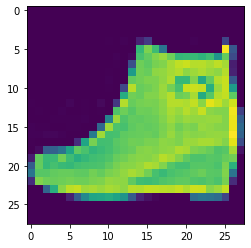

In [ ]:
np.random.seed(5)

idx = np.random.randint(low = 0 , high = 59999) #randomly selecting an index

visual_img = train_images[idx].reshape(28 , 28) #reshaping to visualize the image
plt.imshow(visual_img) #using matplotlib to visualize an image

print('Labels:',labels[train_labels[idx]]) #printing the label

##Step 4: Modelling the Neural Network

In [ ]:
model = Sequential([
    Conv2D(32 , kernel_size = (3 , 3) ,
           kernel_initializer = 'he_uniform' ,
           bias_initializer = 'zeros' , 
           activation = 'relu', input_shape = (28 , 28 , 1)),
    MaxPooling2D((2,2)),
    Conv2D(64 , kernel_size = (3 , 3) , kernel_initializer = 'he_uniform' ,
           bias_initializer = 'zeros' , 
           activation = 'relu' ),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64 , activation = 'relu'),
    Dense(64 , activation = 'relu'),
    Dense(10 , activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs=10,batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.5054 - accuracy: 0.8120
Epoch 2/10
3750/3750 [==============================] - 57s 15ms/step - loss: 0.3344 - accuracy: 0.8765
Epoch 3/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.2870 - accuracy: 0.8935
Epoch 4/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.2604 - accuracy: 0.9027
Epoch 5/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.2384 - accuracy: 0.9121
Epoch 6/10
3750/3750 [==============================] - 62s 17ms/step - loss: 0.2195 - accuracy: 0.9179
Epoch 7/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.2051 - accuracy: 0.9233
Epoch 8/10
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1929 - accuracy: 0.9275
Epoch 9/10
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1827 - accuracy: 0.9312
Epoch 10/10
3750/3750 [==============================] - 54s 14m

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.505385,0.812050
1,0.334361,0.876500
2,0.286988,0.893550
3,0.260368,0.902667
4,0.238361,0.912067


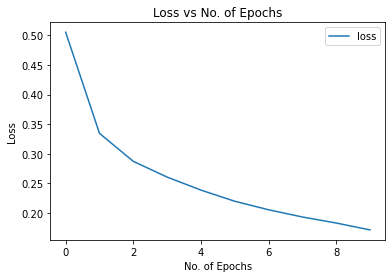

In [ ]:
df.plot(y = 'loss') 
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs No. of Epochs')
plt.show()

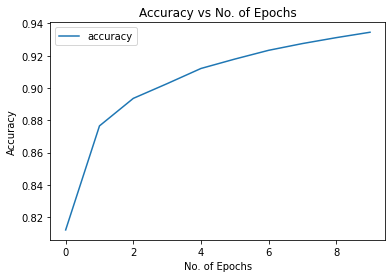

In [ ]:
df.plot(y = 'accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of Epochs')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Evaluate the the model on test sets
test_loss,test_accuracy=model.evaluate(test_images[...,np.newaxis],test_labels)
print('Loss is:',test_loss,'\nAccuracy is:',test_accuracy) 

313/313 [==============================] - 3s 9ms/step - loss: 0.2986 - accuracy: 0.8995
Loss is: 0.2985580265522003 
Accuracy is: 0.8995000123977661


In [ ]:
#make predictions from the model
np.random.seed(33)

idx_test = np.random.randint(low = 0 , high = 9999)
visual_img = test_images[idx_test]
plt.show()
pred = model.predict(img.reshape(28 , 28,1)[np.newaxis,...])
print('The predicted label is:' , labels[np.argmax(pred)] , '\nThe original label is:',labels[test_labels[idx_test]])

The predicted label is: Shirt 
The original label is: Shirt
